<a href="https://colab.research.google.com/github/tommyarmstrong/Titanic/blob/master/Titanic_Tommy_Armstrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

# 1. Introduction
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. 

Of the estimated 2,223 passengers and crew aboard, more than 1,500 died, making the disaster the deadliest peacetime sinking of a superliner or cruise ship.

With much public attention in the aftermath, the disaster has since been the  inspiration of many works of fiction and non-fiction. It has been speculated that passengers in first class cabins were more likely to survive than those in lower class cabins. 

In this project I use passenger data to train a predictive machine learning model that will assess which passengers were most likely to survive the disaster. 

# 2. Import Libraries and Data
In this short section I import libraries and the raw data.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import requests
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import a public module from Github
# This modeule will simplify code in the notebook and so focus on the narrative
url = 'https://raw.githubusercontent.com/tommyarmstrong/Python-Modules/master/tja_modules.py'
r = requests.get(url)
# Ensure filename is the same as the import 
with open('tja_modules.py', 'w') as f:
    f.write(r.text)
# Import the module
import tja_modules as tja
tja.test_module_load()

tja_modules is loaded
Version: 2021-02-19 


In [ ]:
# Import homemade modules from Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#import sys
#sys.path.append('/content/gdrive/My Drive/Google Colab Modules')
#import tja_modules as tja

In [ ]:
# Import data
train_url = "https://raw.githubusercontent.com/tommyarmstrong/Titanic/master/train.csv"
test_url = "https://raw.githubusercontent.com/tommyarmstrong/Titanic/master/final_test.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

##Initial Data Inspection

Data Dictionary

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger’s gender
- Age - The passenger’s age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger’s ticket number
- Fare - The fare the passenger paid (British pounds)
- Cabin - The passenger’s cabin number
- Embarked - The port where the passenger embarked: S=Southampton (England), C=Cherbourg (France), Q=Queenstown (Ireland)



In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
358,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
359,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
360,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
361,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


It appears that both data sets have columns that match the data dictionary, however the "survived" label is capitalized differently and has a different position in the two pandas. 

In [ ]:
# Capitalize the column name in the test pandas 
test_df.rename(columns={'survived': 'Survived'}, inplace=True)

# Move the "Survived" columns to the second column in the test pandas
test_df = test_df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

## Combine the Data
I will combine the data into a single data frame. This will ensure that any cleaning or feature engineering is implemented in exactly the same way for train and test data. 

First, compare the typing of the data and the number of NaN values in each data set. I want to ensure there are a similar percentage of NaNs in each data set before combining them and cleaning them. 





In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  363 non-null    int64  
 1   Survived     363 non-null    int64  
 2   Pclass       363 non-null    int64  
 3   Name         363 non-null    object 
 4   Sex          363 non-null    object 
 5   Age          283 non-null    float64
 6   SibSp        363 non-null    int64  
 7   Parch        363 non-null    int64  
 8   Ticket       363 non-null    object 
 9   Fare         362 non-null    float64
 10  Cabin        68 non-null     object 
 11  Embarked     363 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 34.2+ KB


The data sets have the same Dtype for colummns. Each is missing a large number of values in the Age and Cabin columns, the Train data frame is missing two entries in Embarked and the Test data frame is missing one entry in Fare. 

In [ ]:
# Calculate percentage of missing data
def missing_data(df):
  total_nans = df.isnull().sum()
  percent = total_nans / df.isnull().count() * 100
  missing_df = pd.concat([total_nans, percent], axis=1, keys=['NaNs', 'Percent'])
  missing_df = missing_df[missing_df['Percent'] > 0]
  return missing_df
  
missing_data(train_df)

,NaNs,Percent
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


In [ ]:
missing_data(test_df)

,NaNs,Percent
Age,80,22.038567
Fare,1,0.275482
Cabin,295,81.267218


There are a similar proportion of missing values for Age and Cabin in the training and test data. I am happy to apply the same logic in cleaning both sets. 


In [ ]:
# Add a column to each data set identifying the rows as train or test
# Then combine the data into a single pandas
train_df['Train'] = 1
test_df['Train'] = 0
all_data_df = pd.concat([train_df, test_df]) # Should I re-index these data??
print("Data combined into a single data frame")

Data combined into a single data frame


# 3. Explore the Data

There are entries in the data fro 1,254 passengers. The Report of the Committee on Commerce of the United States Senate listed 1,324 passengers (https://web.archive.org/web/20110501101420/http://www.titanicinquiry.org/USInq/USReport/AmInqRep01.php#a11).

So the data here represent approximately 95% of the passengers abored the Titanic.

In [ ]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 362
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1254 non-null   int64  
 1   Survived     1254 non-null   int64  
 2   Pclass       1254 non-null   int64  
 3   Name         1254 non-null   object 
 4   Sex          1254 non-null   object 
 5   Age          997 non-null    float64
 6   SibSp        1254 non-null   int64  
 7   Parch        1254 non-null   int64  
 8   Ticket       1254 non-null   object 
 9   Fare         1253 non-null   float64
 10  Cabin        272 non-null    object 
 11  Embarked     1252 non-null   object 
 12  Train        1254 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 137.2+ KB


There are eleven columns (excluding the PassengerID and Train columns). 

*   5 Numeric features (int and float): Pclass, Age, SibSp, Parch and Fare 
*   1 Text features: Name 
*   2 Alpha-numeric features: Ticket and Cabin 
*   2 Categorical features: Sex and Embarked 
*   The Survived label 

*Is pClass a classification or a number??*

I should be able to one-hot-encode Sex and Embarked. It maybe that there is numerical data that can be extracted from Name, Ticket and Cabin. As examples,deck and position of the cabin relative to the bow or stern of the ship could be significant. Details on class or social status could be extracted from the Name.



In [ ]:
all_data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Train
count,1254.000000,1254.000000,1254.00000,997.000000,1254.000000,1254.000000,1253.000000,1254.000000
mean,632.513557,0.372408,2.31260,29.838265,0.474482,0.348485,30.946491,0.710526
std,369.710874,0.483639,0.83205,14.277418,1.019633,0.774036,48.756174,0.453699
min,1.000000,0.000000,1.00000,0.330000,0.000000,0.000000,0.000000,0.000000
25%,314.250000,0.000000,2.00000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,627.500000,0.000000,3.00000,28.000000,0.000000,0.000000,13.500000,1.000000
75%,940.750000,1.000000,3.00000,38.500000,1.000000,0.000000,29.700000,1.000000
max,1309.000000,1.000000,3.00000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
all_data_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1254,1254,1254,272,1252
unique,1252,2,929,178,3
top,"Kelly, Mr. James",male,1601,C23 C25 C27,S
freq,2,815,8,5,877


## Top-level Observations

*   37% of passengers survived
*   Age ranged from 4 months to 80 years old, 
*   Average age was only 29 and 75% of passengers were 38 or younger 
*   65% of passengers were male
*   There were passengers travelling with families 
*   At least 75% travelled without family (no parents, children, brothers, sisters, husband or wife)
*   Mean average Fare was £31 although the median is £13.50
*   Highest Fare was £512
*   75% of passengers (929) had unique Tickets



In [ ]:
all_data_df[all_data_df["Name"] == "Connolly, Miss. Kate"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,1
6,898,0,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0


There are two passengers called "Connolly, Miss. Kate". Confirm that these are not duplicate entries.

The entries have different Ages and Ticket numbers. Both passengers board in Queenstown, Ireland. It seems reasonable that Kate Connolly was a common name. 

Out of interest, was it common for women to be travelling on the titanic without immediate family?

There were 122 women travelling without immediate family (approx 10% of all passengers). At least 25% of those were travelling first class and at least 50% first or second class. 75% survived. 



In [ ]:
temp_df = all_data_df[(all_data_df["Sex"] == "female") & (all_data_df["SibSp"] == 0) & (all_data_df["Age"] > 18) & (all_data_df["Parch"] == 0)]
temp_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Train
count,122.000000,122.000000,122.000000,122.000000,122.0,122.0,122.000000,122.000000
mean,625.352459,0.745902,2.032787,32.217213,0.0,0.0,43.040336,0.696721
std,369.703476,0.437148,0.852167,10.872664,0.0,0.0,68.391527,0.461570
min,3.000000,0.000000,1.000000,18.500000,0.0,0.0,6.950000,0.000000
25%,312.250000,0.250000,1.000000,23.250000,0.0,0.0,7.925000,0.000000
50%,593.500000,1.000000,2.000000,30.000000,0.0,0.0,13.000000,1.000000
75%,960.250000,1.000000,3.000000,37.750000,0.0,0.0,38.953125,1.000000
max,1306.000000,1.000000,3.000000,63.000000,0.0,0.0,512.329200,1.000000


## Family Groups
### Anna Ward
I am interested in the female travelling alone with a ticket costing £512. This is the most expensive ticket in the data set. 

An Internet search on "Anna Ward" shows that she was actually the personal maid to wealthy widow Charlotte Drake Cardeza. A group of four passengers all travelled on the same ticket, "PC 17755". Anna, Charlotte, Thomas (Charlotte's son) and Gustave Lesurer (Thomas' manservant). 

It is not clear from the data whether the Fare was paid per passenger or for the entire group. It looks like Charlotte and Thomas had a suite of cabins (B51, B53 and B55), Gustave had cabin B101 but it is not clear which cabin Charlotte used. 

This highlights some challenges with data. The Fare associated with Anna is skewing the average fares paid by women travelling alone (is it even true to say that Anna was travelling alone). Yet this fare is more reasonably associated with her employer. Whilest Anna was likely travelling in or physically close to the first class cabins (all four members of the party escaped on lifeboat number 3 and survived) she might not be reasonably classified with first class travellers based on other inputs. 

In [ ]:
all_data_df[all_data_df["Ticket"] == "PC 17755"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1
307,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,0


### Contrasting Travelling Parties
Exploring further the nature of cabin sharing shows contrasting travel arrangements. The cabins shared by the most occupants are G6 and "C23 C25 C27", which each have five occupants. 


In [ ]:
all_data_df.Cabin.value_counts()


C23 C25 C27    5
G6             5
B96 B98        4
D              4
C78            4
              ..
C130           1
C7             1
B11            1
B79            1
D50            1
Name: Cabin, Length: 178, dtype: int64

Cabin G6 was in third class. It accomodated two married women travellingn with their infant children: Mrs Elna Strom (29) with daughter Telma (2) and Mrs Agnes Sandstrom (24) with daughters Marguerite (4) and Beatrice (1). They paid £10 and £16 on different ticket numbers. They are each travelling with a sibling or spouce but their daughters are only travelling with one parent. Could Elna and Agnes be sisters or sister in law (their sirnames are similar)? 

Agnes and her daughters survived, but Elna and her daughter did not. 

Cabins C23 C25 C27 were adjecent cabins in first class. They accomodated Mr Mark Fortune (62) and his three adult daughters (28, 24 and 23) and adult son (19). They paid £263 for their cabins. The children are only travelling with one parent but Mark is travelling with either a spouce or sibling (although nobody else is sharing their suite or ticket number). 

The three women survived but Mark and his son did not. 

In [ ]:
# who was in cabin G6
all_data_df[all_data_df["Cabin"] == "G6"]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,1
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,1
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,1
112,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,G6,S,0


In [ ]:
# Who was in cabins C23, C25 and C27
all_data_df[all_data_df["Cabin"] == "C23 C25 C27"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,1
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,1
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S,0


I have created a function to vizualize survivial by other features in the data.


In [ ]:
# Function to vizualize survival related to other features
def plot_deaths(df, cols, column_names, title):
  pivot_df = pd.pivot_table(
      df,
      index = 'Survived',
      columns = cols,
      values = 'PassengerId',
      aggfunc = 'count'
  )
  pivot_df.index = ['Died', 'Survived']
  pivot_df.columns = column_names

  fig = go.Figure()
  for column in pivot_df.columns:
    fig.add_trace(go.Bar(
        x = pivot_df.index,
        y = pivot_df[column],
        name = column
        ))
  fig.update_layout(
    barmode='relative',
    title=title,
    autosize=False,
    width=500,
    height=500,
    legend=dict(
      yanchor="bottom",
      y=0.8,
      xanchor="right",
      x=0.98)
    )
  fig.show()

  return pivot_df

## Cabin Class
Hypothesis: Passengers in first class were more likely to survive than passengers in third class. 

In [ ]:
# Plot deaths relative to cabin class
df = plot_deaths(all_data_df, 'Pclass', ['First', 'Second', 'Third'], 'Deaths Relative to Cabin Class')

In [ ]:
# Pivot the data in Pclass 
pd.pivot_table(all_data_df, index='Pclass')

,Age,Fare,Parch,PassengerId,SibSp,Survived,Train
Pclass,,,,,,,
1,39.257385,81.953289,0.337793,635.247492,0.418060,0.598662,0.722408
2,29.339718,20.378361,0.344697,645.428030,0.382576,0.428030,0.696970
3,25.082986,12.887004,0.354559,626.396527,0.534009,0.253256,0.710564


Cabin class was a factor in survival chances. The highest proportion of survivors was in first class (60%), then in second class (43%) and third class had the smallest proportion (25%).

## Women and Children First!
I am interested in how gender and age relate to survival chances

### Gender
**Hypothesis: Women were more likely to survive.**

I want to evaluate whether females were more likely to survive than males. 

In [ ]:
# Plot deaths relative to gender
df = plot_deaths(all_data_df, 'Sex', ['Female', 'Male'], 'Deaths Relative to Gender')

In [ ]:
# Pivot the data on gender
pd.pivot_table(all_data_df, index='Sex')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Train
Sex,,,,,,,,
female,28.601708,43.202545,0.603645,616.075171,2.177677,0.642369,0.703872,0.715262
male,30.546262,24.336654,0.211043,641.368098,2.385276,0.384049,0.193865,0.707975


Females were much more likely to survive (70%) than males (19%). 

Other interesting observations for Female passengers include:
*   A much higher average Fare (£43 compared to £24)
*   More likely to be in higher class cabins
*   Travelled with more parents or children
*   Travelled with more siblings or spouce
*   About 2 years younger than Males, on average

### Combining Gender and Cabin Class
There seems to be clear correlations between both gender and cabin class and the chance of survival. 

In [ ]:
# Pivot the data on both gender and cabin class
pd.pivot_table(all_data_df,index=['Sex','Pclass'])

Age        Fare     Parch  ...     SibSp  Survived     Train
Sex    Pclass                                   ...                              
female 1       36.891667  103.949777  0.465649  ...  0.557252  0.923664  0.717557
       2       27.150208   22.536785  0.626263  ...  0.494949  0.878788  0.767677
       3       22.782313   14.915572  0.679426  ...  0.765550  0.483254  0.688995
male   1       41.285143   64.801265  0.238095  ...  0.309524  0.345238  0.726190
       2       30.722566   19.083307  0.175758  ...  0.315152  0.157576  0.654545
       3       26.071871   12.005568  0.213693  ...  0.433610  0.153527  0.719917

[6 rows x 7 columns]

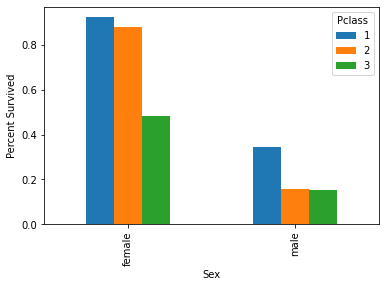

In [ ]:
sex_class_df = pd.pivot_table(all_data_df,index='Sex', columns='Pclass', values='Survived')
sex_class_df.plot(kind='bar', ylabel='Percent Survived')

This visualizations suggests that gender was more relevant than cabin class in determining survival chances. 

Most women in first (92%) and second (88%) class survived along with almost half (48%) of the women in third class. 

Few men survived. There was little difference between second class (15.8%) and third class (15.4%) survival for men. Even in first class, just over one third (35%) of men survived, a significantly lower proportion than of women in third class. 

It would seem that women were prioritized in the evacuation. 

### Age
**Hypothesis: Infants also prioritized during the evacuation.**

The plot below shows that age distribution of passengers. Most passenger ages fall into a skewed Gaussian. However there is a second peak for infants aged zero to four.

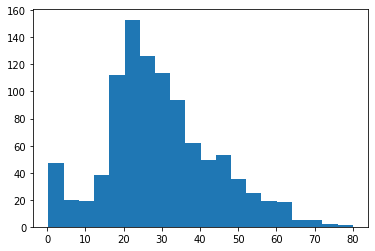

In [ ]:
# Show age distribution for all passengers
plt.hist(all_data_df['Age'], bins =20)
plt.show()

Were infants under the age of 10 more or less likely to survive than adults?

The plot below shows that a disproportionate number of infants under the age of 10 survived, which is countered by a disproportionate number of adults in the age range 18 to 40 who did not survive. 

It would seem like women and children were prioritized in the evacuation.

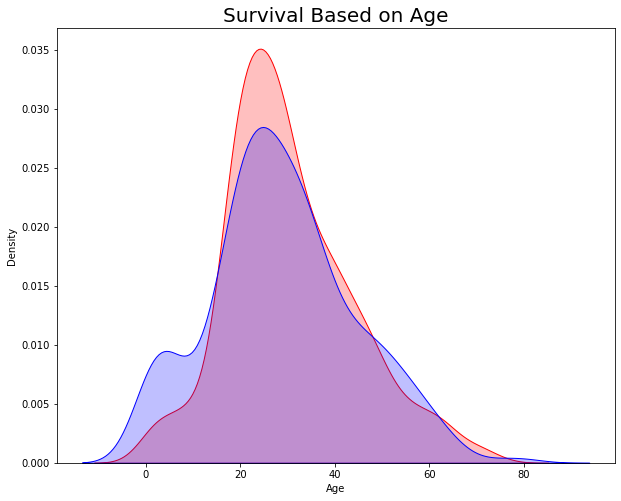

In [ ]:
# Plot survival against age
fig,axs=plt.subplots(figsize=(10,8))
sns.set_style(style='whitegrid')
sns.kdeplot(all_data_df.loc[(all_data_df['Survived']==0), 'Age'], color='r', shade=True, label='Died')
sns.kdeplot(all_data_df.loc[(all_data_df['Survived']==1), 'Age'], color='b', shade=True, label='Survived')
plt.title('Survival Based on Age', color = 'black', fontsize = 20);

The plot below shows age-related survival in each cabin class. The average age of passengers in first class is greater and there are few children. Almost all of the infants in second class, and the majority in third class, survived. 



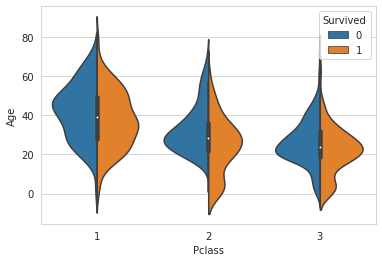

In [ ]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=all_data_df, split=True)


## Vizualizing Features

Here are some fast visualizations of features using Seabourne.

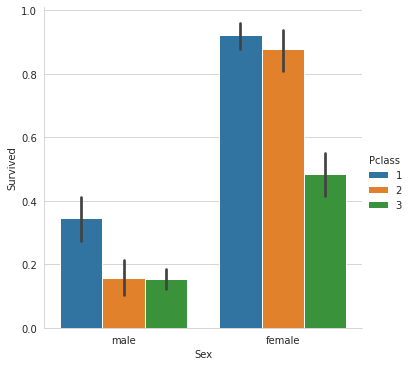

In [ ]:
# Factorplot is much faster at creating the survival based on Pclass and Sex 
# features than the pivot table method I used above.
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=all_data_df, kind='bar')

The plot below shows that men had a greater chance of survival when travelling with a sibling or spouce. Perhaps this is related to travelling with a family and therefore benefitting from "women and children first".

The chance of survival plummited if travelling with fout or more siblings. 

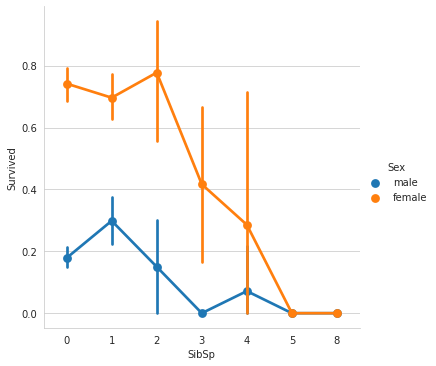

In [ ]:
# Plot Survival against SibSp 
sns.factorplot(x='SibSp', y='Survived', hue = 'Sex', data = all_data_df)

The heatmap below suggests that Fare (and inversly cabin class) were most strongly correled with survival (note that gender is not ploted). 

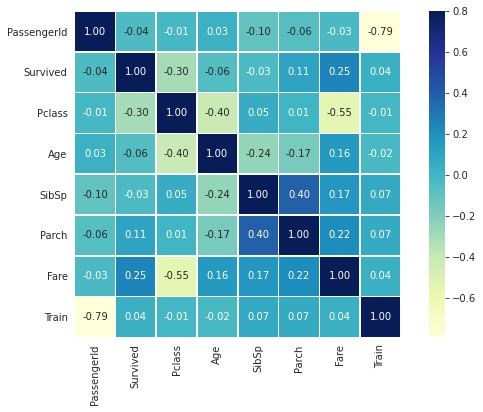

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(all_data_df.corr(), vmax=0.8, linewidths=0.5, fmt='.2f', square=True, annot=True, cmap='YlGnBu',linecolor="white");

# 4. Feature Engineering and Data Cleaning

## Extracting Titles from Name
The Name feature typically contains a title (Mr, Mrs, Miss, etc). I will extract the title from the Name column and create a new feature called Title. The title can be classified and then evaluated by a model in ways the name itself cannot.

In [ ]:
# Use pattern match to find title in the Name column
all_data_df['Title'] = all_data_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# There are 18 different titles
df = pd.pivot_table(all_data_df, index='Title', aggfunc={'PassengerId': 'count'})

# Group the titles
all_data_df["Title"] = all_data_df["Title"].replace('Mlle', 'Miss')
all_data_df["Title"] = all_data_df["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
all_data_df["Title"] = all_data_df["Title"].replace('Don','Mr')
all_data_df["Title"] = all_data_df["Title"].replace(['Capt','Rev','Major', 'Col','Dr'], 'Professional')
all_data_df["Title"] = all_data_df["Title"].replace(['Lady', 'Countess','Sir','Jonkheer'], 'Honour')

# There are now 6 different Titles
pd.pivot_table(all_data_df, index='Title', aggfunc={'PassengerId': 'count'})

,PassengerId
Title,
Honour,4
Master,55
Miss,249
Mr,736
Mrs,187
Professional,23


## Missing Data 
In this section I will deal with missing data in the features:
*   Age
*   Cabin
*   Fare
*   Embarked

**Embarked**

There are two NaNs in the Embarked column. These are for two women travelling on the same ticket and sharing cabin B28 in first class. Their names do not sound obviously French or Irish so, given that the majority of passengers embarked at Southhampton (70%) I will assign Southampton (S) as their port of embarkation.


In [ ]:
all_data_df[all_data_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


In [ ]:
df = pd.pivot_table(all_data_df, index='Embarked', aggfunc={'PassengerId': 'count'})
df['Percent'] = df['PassengerId'] / df['PassengerId'].sum() * 100
df

,PassengerId,Percent
Embarked,,
C,252,20.127796
Q,123,9.824281
S,877,70.047923


In [ ]:
all_data_df['Embarked'] = all_data_df['Embarked'].fillna('S')
print("NaNs in Embarked column replaced with S (for Southampton)")

NaNs in Embarked column replaced with S (for Southampton)


**Cabin**

There are 982 missing values for Cabin (78% of rows). Potentially Cabin could be informative, since this would indicate the deck (higher decks were closer to lifeboats). However there is no obvious way to infer the cabin from other data, so I will drop the column when I drop the columns of least value. 

**Fare**

The only passenger where we do not know the fare paid is Mr Thomas Storey, a 60 year old man, travelling in third class. I will replace the null value with the average fare for passengers in third class with the title "Mr" (£7.90).

In [ ]:
all_data_df.loc[all_data_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train,Title
144,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [ ]:
med_ave_fare = all_data_df[(all_data_df['Pclass']==3) & (all_data_df['Title'] == 'Mr')]['Fare'].median()
all_data_df.loc[(all_data_df['Fare'].isnull()) & (all_data_df['Title'] == 'Mr') & (all_data_df['Pclass'] == 3), 'Fare'] = med_ave_fare
print("NaN values replace in Fare column")

NaN values replace in Fare column


**Age** 

I know that Age was an important factor in survival (most infants survived). There are 257 rows (20%) with missing values of Age. I suspect that age varies across cabin class and with title. 

In [ ]:
# Show median Age for passengers based on Title and Cabin Class
classes = [1,2,3]
titles = ['Mr', 'Mrs', 'Master', 'Miss']
for title in titles: 
  for class_number in classes: 
    age_to_impute = all_data_df[all_data_df['Pclass']==class_number].groupby('Title')['Age'].median()[title]
    print(f"Title: {title}\tCabin Class: {class_number}\tMedian Age: {age_to_impute}")

Title: Mr	Cabin Class: 1	Median Age: 41.0
Title: Mr	Cabin Class: 2	Median Age: 30.0
Title: Mr	Cabin Class: 3	Median Age: 26.0
Title: Mrs	Cabin Class: 1	Median Age: 45.0
Title: Mrs	Cabin Class: 2	Median Age: 30.0
Title: Mrs	Cabin Class: 3	Median Age: 31.0
Title: Master	Cabin Class: 1	Median Age: 5.0
Title: Master	Cabin Class: 2	Median Age: 2.0
Title: Master	Cabin Class: 3	Median Age: 6.0
Title: Miss	Cabin Class: 1	Median Age: 30.0
Title: Miss	Cabin Class: 2	Median Age: 20.0
Title: Miss	Cabin Class: 3	Median Age: 18.75


Indeed age did vary between cabin class and with title. I will replace missing values with the median age for the title and cabin class

In [ ]:
# Set median Age for passengers based on Title and Cabin Class
# Apply for Mr, Mrs, Master and Miss
classes = [1,2,3]
titles = ['Mr', 'Mrs', 'Master', 'Miss']
for title in titles: 
  for cabin_class in classes: 
    age_to_impute = all_data_df[all_data_df['Pclass']==cabin_class].groupby('Title')['Age'].median()[title]
    all_data_df.loc[(all_data_df['Age'].isnull()) & (all_data_df['Title'] == title) & (all_data_df['Pclass'] == cabin_class), 'Age'] = age_to_impute
print("Age set for passengers with title Mr, Mrs, Master and Miss in all cabin classes")

Age set for passengers with title Mr, Mrs, Master and Miss in all cabin classes


In [ ]:
# Check for remaining Age is NaN
all_data_df.loc[all_data_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Train,Title
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,1,Professional


In [ ]:
# Set for Professionals in Frist Class
age_to_impute = all_data_df[all_data_df['Pclass']==1].groupby('Title')['Age'].median()['Professional']
all_data_df.loc[(all_data_df['Age'].isnull()) & (all_data_df['Title'] == "Professional") & all_data_df['Pclass'] == 1, 'Age'] = age_to_impute
print("Age set for Professionals in First Class")

Age set for Professionals in First Class


**Age for passengers with the title *Miss*** 

There is a challenge in using the average age for passengers with the title "Miss". I can be certain that males with the title "Master" are infants -- they have an average age of four. Females with the title "Miss" could be either infants or unmarried adults. The median age for Miss in first class is 30. 

There were 50 passengers with the title "Miss" of which 47 were in thrid class. The median age for "Miss" in third class was 18.75. I will use that value given I have no better value and do not want to delete 50 rows of data.

In [ ]:
# Check there are no more NaNs in the data
all_data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          982
Embarked         0
Train            0
Title            0
dtype: int64

## Encoding

I need to encode the data so that Machine Learning models can understand it. First I will eliminate any colums that will not be useful. 

I will drop the collowing columns:
*   Ticket -- could perhaps have used this to group parties that did not share a familiy name
*   Cabin -- could perhaps have used this to determine proximity to life boats, however there are much missing data
*   Name
*   PassengerId

I will then one-hot encode:
*   Sex
*   Embarked
*   Title

In [ ]:
# Drop columns that are not required
all_data_df = tja.drop_columns(all_data_df, ['Cabin', 'Ticket', 'Name', 'PassengerId'])

Dropped column: Cabin
Dropped column: Ticket
Dropped column: Name
Dropped column: PassengerId


In [ ]:
# Encode columns of categorical data
all_data_df = tja.one_hot_encode(all_data_df, ['Sex', 'Embarked', 'Title'])

One-hot encoded: Sex
One-hot encoded: Embarked
One-hot encoded: Title


In [ ]:
# Scale columns between 0 and 1
all_data_df = tja.scale_data(all_data_df, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

Scaled: Pclass
Scaled: Age
Scaled: SibSp
Scaled: Parch
Scaled: Fare


After encoding the data Seabourne Heatmap suggests strong correlations between survival chances and both cabin class and gender 

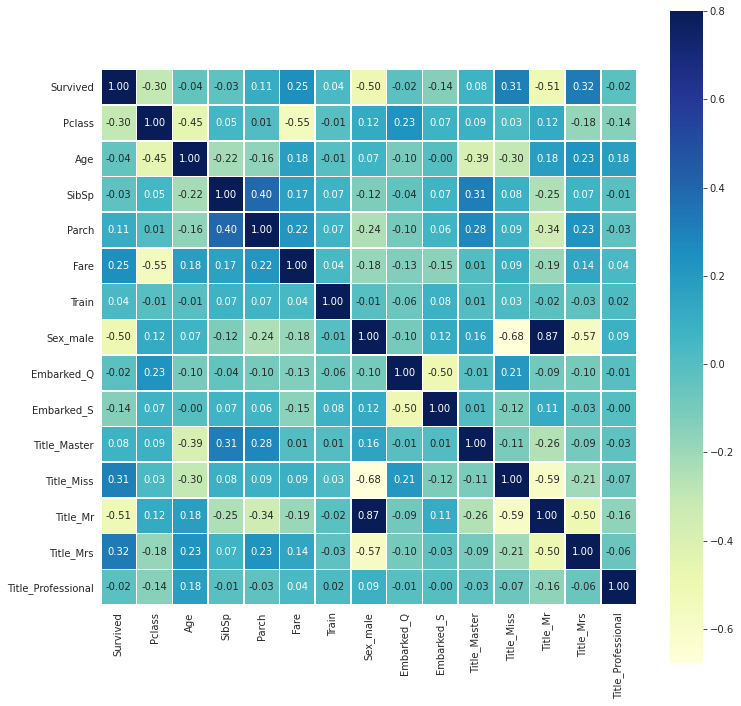

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(all_data_df.corr(), vmax=0.8, linewidths=0.5, fmt='.2f', square=True, annot=True, cmap='YlGnBu',linecolor="white");

## Split Train and Test Data

I need to divide the data  into train and test data based on the original splits, then seperate the features and the labels.

In [ ]:
# Split data into train and test and separate labels from features
x_train, y_train, x_test, y_test = tja.split_data(all_data_df, 'Survived', 'Train')

# 5. Machine Learning

## Neural Net Model
I will use keras to build a neural net. 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create a Neural Net model
model = Sequential()

# Add layers
model.add(Dense(5, input_dim = 13, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the Neural Net
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=16)

Epoch 1/30
56/56 [==============================] - 1s 1ms/step - loss: 0.6452 - accuracy: 0.6074
Epoch 2/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.6147
Epoch 3/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.6200
Epoch 4/30
56/56 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7183
Epoch 5/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4916 - accuracy: 0.8160
Epoch 6/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8209
Epoch 7/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8216
Epoch 8/30
56/56 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8145
Epoch 9/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8492
Epoch 10/30
56/56 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8542
Epoch 11/30
56/56 [

In [ ]:
# Evaluate the model on the test data
print(f"Accuracy: {model.evaluate(x_test, y_test)[1]*100}")

12/12 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.7493
Accuracy: 74.93112683296204
